# Paper Figures

---
# Setup

## Modules

In [1]:
import os
from Bio import Phylo, AlignIO
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors, gridspec, lines
import scipy
import math
import numpy as np
import geopandas
import datetime
import shapely
import copy
from geopy import distance
import geopy
import cartopy.crs as ccrs

## Paths

In [2]:
project_dir = "/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/main/"

# ------------------------------------------
# Full Dataset
divtree_path        = project_dir + "iqtree/all/chromosome/full/filter5/iqtree.filter.nwk"
timetree_path       = project_dir + "lsd/all/chromosome/full/filter5/lsd.nex"
metadata_path       = project_dir + "snippy_multi/all/chromosome/full/metadata.tsv"
constant_sites_path = project_dir + "snippy_multi/all/chromosome/full/snippy-multi.constant_sites.txt"
aln_path            = project_dir + "lsd/all/chromosome/full/filter5/lsd.filter.aln"
latlon_path         = project_dir + "beast2/all/chromosome/full/filter5/beast.latlon.txt"
xu_2019_path        = project_dir + "figures/xu2019.csv"

out_dir = project_dir + "figures/"
if not os.path.exists(out_dir):
    os.mkdir(out_dir)

## Variables

In [177]:
pd.set_option("display.max_rows", 10, "display.max_columns", None)

CURRENT_YEAR = datetime.datetime.utcnow().year

# Sequence length
with open(constant_sites_path) as infile:
    data = infile.read().strip().split(",")
    constant_sites = sum([int(count) for count in data])

aln = AlignIO.read(aln_path, "fasta")
variant_sites = len(aln[0].seq)

SEQ_LEN = constant_sites + variant_sites

# Geo
CRS = "epsg:3857"
CRS_EPSG = ccrs.epsg('3857')
world_polygons = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))

# Reference
REF_DATE_BP = CURRENT_YEAR - 1992
REF_BRANCH_MAJOR = "1.ORI"
REF_BRANCH_MINOR = "1.ORI1"

# Plotting
SM_FONT = 4
MED_FONT = 6
LG_FONT = 8
D3_PAL = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b" ]

"""plt.rc("font", size=SM_FONT)  # controls default text sizes
plt.rc("lines", linewidth=0.5)
plt.rc("figure", titlesize=SM_FONT)  # fontsize of the figure title
plt.rc("legend", title_fontsize=SM_FONT)  # fontsize of the legend title
plt.rc("legend", fontsize=SM_FONT)  # fontsize of the legend title
plt.rc("legend", frameon=True)  # legend frame
plt.rc("axes", labelsize=SM_FONT)  # fontsize of the x and y labels
plt.rc("axes", titlesize=SM_FONT)  # fontsize of axis titles"""
"""

d62728 
9467bd 
8c564b 
e377c2 #e377c2
7f7f7f #7f7f7f
bcbd22 #bcbd22
17becf #17becf"""

BRANCH_LIST = {
    "0.PRE": ["0.PRE1", "0.PRE2"], 
    "0.ANT4" : ["0.ANT4"], 
    "0.PE": ["0.PE4m", "0.PE4m", "0.PE4t", "0.PE4a", "0.PE5"],   
    "0.ANT": ["0.ANT1", "0.ANT2","0.ANT3","0.ANT5"],     
    "1.PRE" : ["1.PRE1", "1.PRE2", "1.PRE3"],    
    "1.ANT": ["1.ANT1"], 
    "1.IN": ["1.IN1","1.IN2","1.IN3"],   
    "1.ORI" : ["1.ORI1", "1.ORI2", "1.ORI3"],
    "2.ANT": ["2.ANT1","2.ANT2","2.ANT3" ], 
    "2.MED": ["2.MED0", "2.MED1","2.MED2","2.MED3" ], 
    "3.ANT": ["3.ANT1", "3.ANT2" ],     
    "4.ANT": ["4.ANT1" ],           
}

ANCIENT_BRANCH_LIST = {
    "0.PRE": ["0.PRE1", "0.PRE2"], 
    "0.ANT4" : ["0.ANT4"],  
    "1.PRE" : ["1.PRE1", "1.PRE2", "1.PRE3"],     
}


## Import Trees

In [4]:
# Divtree
divtree = Phylo.read(divtree_path, "newick")
divtree.ladderize(reverse=False)

# Timetree
trees = Phylo.parse(timetree_path, "newick")
for tree in trees:
    clades = [c for c in tree.find_clades()]
    if len(clades) > 1:
        break
timetree = tree
timetree.ladderize(reverse=False)

## Import Metadata

<GeoAxesSubplot:>

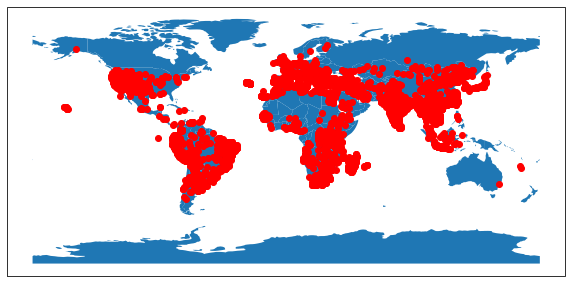

In [5]:
xu_2019_df = pd.read_csv(xu_2019_path, sep=',')

geometry = []

for rec in xu_2019_df.iterrows():
    sample = rec[0]
    lon = float(rec[1]["X"].replace("'",""))
    lat = float(rec[1]["Y"].replace("'",""))
    point = shapely.geometry.Point(lon,lat)
    geometry.append(point)

xu_2019_gdf = geopandas.GeoDataFrame(xu_2019_df, crs=CRS, geometry=geometry)

# Generate a figure with two axes, one for CartoPy, one for GeoPandas
fig, ax = plt.subplots(1, subplot_kw={'projection': CRS_EPSG},
                        figsize=(10, 5))
world_polygons.plot(ax=ax)
xu_2019_gdf.plot(ax=ax, c="red")

,strain,date,date_bp,country,province,country_lat,country_lon,province_lat,province_lon,biovar,branch_major,branch_minor,biosample_accession,biosample_comment,branch_number,continent,geometry_lat,geometry_lon,geometry
sample,,,,,,,,,,,,,,,,,,,
GCA_009909635.1_ASM990963v1_genomic,9_10,1923,-98,Russia,Rostov Oblast,64.6863,97.7453,47.6222,40.7958,Medievalis,2.MED,2.MED1,SAMN13632815,KEEP: Assembly Modern,2,Europe,47.622245,40.795794,POINT (40.79579 47.62225)
GCA_009669545.1_ASM966954v1_genomic,42126,2006,-15,China,Xinjiang,35.0001,105,42.4805,85.4633,Antiqua,0.ANT,0.ANT1,SAMN07722925,KEEP: Assembly Modern,0,Asia,42.480495,85.463346,POINT (85.46335 42.48050)
GCA_009669555.1_ASM966955v1_genomic,42123,2005,-16,China,Xinjiang,35.0001,105,42.4805,85.4633,Antiqua,0.ANT,0.ANT1,SAMN07722924,KEEP: Assembly Modern,0,Asia,42.480495,85.463346,POINT (85.46335 42.48050)
GCA_009669565.1_ASM966956v1_genomic,42118,2005,-16,China,Xinjiang,35.0001,105,42.4805,85.4633,Antiqua,0.ANT,0.ANT1,SAMN07722923,KEEP: Assembly Modern,0,Asia,42.480495,85.463346,POINT (85.46335 42.48050)
GCA_009669605.1_ASM966960v1_genomic,42117,2005,-16,China,Xinjiang,35.0001,105,42.4805,85.4633,Antiqua,0.ANT,0.ANT1,SAMN07722922,KEEP: Assembly Modern,0,Asia,42.480495,85.463346,POINT (85.46335 42.48050)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAMEA7313246_49,Gdansk8,[1400:1700],[-621:-321],Poland,Pomeranian Voivodeship,52.2159,19.1344,54.2456,18.1099,Second Pandemic,1.PRE,1.PRE1,SAMEA7313246_49,KEEP: SRA Ancient Combined Record,1,Europe,54.245560,18.109900,POINT (18.10990 54.24556)
SAMEA6651390,AGU010,[1435:1477],[-586:-544],Lithuania,Vilnius County,55.35,23.75,54.8227,25.2495,Second Pandemic,1.PRE,1.PRE1,SAMEA6651390,KEEP: SRA Ancient,1,Europe,54.822692,25.249534,POINT (25.24953 54.82269)
SAMEA6637004,AGU025,[1441:1612],[-580:-409],Lithuania,Vilnius County,55.35,23.75,54.8227,25.2495,Second Pandemic,1.PRE,1.PRE1,SAMEA6637004,KEEP: SRA Ancient,1,Europe,54.822692,25.249534,POINT (25.24953 54.82269)


<GeoAxesSubplot:>

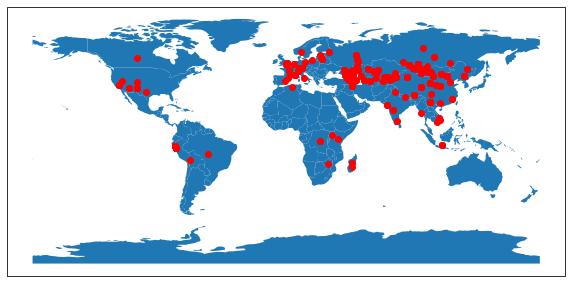

In [6]:
metadata_df = pd.read_csv(metadata_path, sep='\t')
metadata_df.set_index(metadata_df.columns[0], inplace=True)
metadata_copy_df = copy.deepcopy(metadata_df)

latlon_df = pd.read_csv(latlon_path, sep='\t')
latlon_df.set_index(latlon_df.columns[0], inplace=True)

for sample in metadata_df.index:
    if sample not in latlon_df.index:
        metadata_copy_df.drop(sample, inplace=True)


geometry = []

for rec in latlon_df.iterrows():
    sample = rec[0]
    if sample == "Reference":
        continue
    lat = rec[1]["lat"]
    lon = rec[1]["lon"]
    metadata_copy_df.at[sample, "geometry_lat"] = lat
    metadata_copy_df.at[sample, "geometry_lon"] = lon
    point = shapely.geometry.Point(lon,lat)
    geometry.append(point)

# Now add reference Metadata
point = shapely.geometry.Point(latlon_df["lon"]["Reference"],latlon_df["lat"]["Reference"])
metadata_copy_df.at["Reference", "strain"] = "CO92"
metadata_copy_df.at["Reference", "geometry_lat"] = latlon_df["lat"]["Reference"]
metadata_copy_df.at["Reference", "geometry_lon"] = latlon_df["lon"]["Reference"]
metadata_copy_df.fillna("NA", inplace=True)

geometry.append(point)
    
#metadata_gdf = geopandas.GeoDataFrame(metadata_copy_df, crs=CRS, geometry=geometry)
metadata_gdf = geopandas.GeoDataFrame(metadata_copy_df, crs="epsg:3857", geometry=geometry)

display(metadata_gdf)

# Test map

# Generate a figure with two axes, one for CartoPy, one for GeoPandas
fig, ax = plt.subplots(1, subplot_kw={'projection': CRS_EPSG},
                        figsize=(10, 5))
world_polygons.plot(ax=ax)
metadata_gdf.plot(ax=ax, c="red")

# Colors

Use the full tree for color order

In [7]:
# Colors
attr_states = list(dict.fromkeys(metadata_gdf["branch_major"]))
# Create the custom color map (pyplot)
cmap = plt.get_cmap("rainbow", len(attr_states))
# Convert the color map to a list of RGB values
cmaplist = [cmap(i) for i in range(cmap.N)]
# Convert RGB values to hex colors
attr_hex = [colors.to_hex(col) for col in cmaplist]
colors_dict = {}

# Assign states colors based on tip order
i_hex = 0
for c in divtree.get_terminals():
    if c.name == "Reference":
        branch = "1.ORI"
    else:
        branch = metadata_gdf["branch_major"][c.name]
    if branch not in colors_dict:
        colors_dict[branch] = attr_hex[i_hex]
        i_hex += 1
        
print(colors_dict)

{'0.PRE': '#8000ff', '0.PE': '#5148fc', '0.ANT': '#238af5', '3.ANT': '#0cc1e8', '4.ANT': '#3ae8d7', '2.ANT': '#68fcc1', '2.MED': '#97fca7', '1.PRE': '#c5e88a', '1.ANT': '#f3c16a', '1.IN': '#ff8a48', '1.ORI': '#ff4824'}


---
# Functions

## Get X and Y Positions

In [8]:
def get_x_positions(tree):
    """Create a mapping of each clade to its horizontal position.
    Dict of {clade: x-coord}
    """
    depths = tree.depths()
    # If there are no branch lengths, assume unit branch lengths
    if not max(depths.values()):
        depths = tree.depths(unit_branch_lengths=True)
    return depths


# This code is from the biopython Phylo module
def get_y_positions(tree):
    """Create a mapping of each clade to its vertical position.
    Dict of {clade: y-coord}.
    Coordinates are negative, and integers for tips.
    """
    maxheight = tree.count_terminals()
    # Rows are defined by the tips
    heights = {
        tip: maxheight - i for i, tip in enumerate(reversed(tree.get_terminals()))
    }

    # Internal nodes: place at midpoint of children
    def calc_row(clade):
        for subclade in clade:
            if subclade not in heights:
                calc_row(subclade)
        # Closure over heights
        heights[clade] = (heights[clade.clades[0]] + heights[clade.clades[-1]]) / 2.0

    if tree.root.clades:
        calc_row(tree.root)
    return heights

## Parse Nexus Comment

In [9]:
## Parse Comment

def parse_comment(comment):
    """
    Parse nexus comment into dict
    """
    comment_dict = {}
    comment = comment.lstrip("&").replace('"','')
    attr_name = ""
    attr_val = ""
    comment_sep = ","
    attr_sep = "="
    
    parsing_name = True
    parsing_val = False

    for i in range(0, len(comment)):
        
        # Parsing attribute names
        if parsing_name:
            if comment[i] != attr_sep:    
                attr_name += comment[i] 
            else:
                comment_dict[attr_name] = ""
                parsing_name = False
                parsing_val = True
            
        elif parsing_val:
            if comment[i] == comment_sep:
                # The val does not contain an interval, truly the end
                if "{" not in attr_val or ("{" in attr_val and "}" in attr_val):
                    comment_dict[attr_name] = attr_val
                    attr_val = ""
                    attr_name = ""
                    parsing_val = False
                    parsing_name = True
                else:
                    attr_val += comment[i]
            elif i == len(comment) - 1:
                attr_val += comment[i]                
                comment_dict[attr_name] = attr_val 
            else:
                attr_val += comment[i]
                

    return(comment_dict)

## Convert Time Ticks

In [10]:
# My own conversion function
def convert_timetree_ticks(tree, step):
    """
    Return a dict of axis locations and labels for an input timetree tree.
    """
    # Step 1: Figure out offset to convert year branch length to calendar date
    if not tree.root.branch_length:
        tree.root.branch_length = 0
    min_date = tree.root.numdate - tree.root.branch_length
    max_date = np.max([n.numdate for n in tree.get_terminals()])
    offset = min_date
    date_range = max_date - min_date

    # Step 2: Relabel xticks and space them differently
    # Distance between ticks
    dtick = step
    # Minimum tick value
    min_tick = step * (offset // step)

    # Extra tick increment
    extra = dtick if dtick < date_range else dtick
    # New tick values
    tick_vals = np.arange(min_tick, min_tick + date_range + extra, dtick)
    # New tick locations
    tick_locs = list(tick_vals - offset)
    # New tick labels
    tick_labels = ["%d" % (int(x)) for x in tick_vals]
    return {"tick_locs": tick_locs, "tick_labels": tick_labels}


---
# Parse Tree Into Dataframe

In [11]:
x_posns = get_x_positions(divtree)
y_posns = get_y_positions(divtree)


for c in divtree.get_terminals():

    coord_x = [value for key,value in x_posns.items() if key.name == c.name][0]
    coord_y = [value for key,value in y_posns.items() if key.name == c.name][0]
    metadata_gdf.at[c.name, 'divtree_coord_x'] = coord_x
    metadata_gdf.at[c.name, 'divtree_coord_y'] = coord_y
        
    if c.name == "Reference":
        date_mean = REF_DATE_BP
        date_range = [date_mean,date_mean]
        branch_major = REF_BRANCH_MAJOR
        branch_minor = REF_BRANCH_MINOR      
    else:
        # Dates
        date = metadata_gdf["date_bp"][c.name].strip("[]").split(":")
        if len(date) == 1:
            date_mean = int(date[0])
            date_range = [date_mean,date_mean]
        else:
            date_range = [int(d) for d in date]           
            date_mean = sum(date_range)/len(date_range)
            
        # Branch
        branch_major = metadata_df["branch_major"][c.name]
        branch_minor = metadata_df["branch_minor"][c.name]
        
    # Remove letters at end
    while branch_minor[-1].isalpha():
        branch_minor = branch_minor[:-1]
    
    calendar_date = date_mean + CURRENT_YEAR
    calendar_date_lower = date_range[0] + CURRENT_YEAR
    calendar_date_upper = date_range[1] + CURRENT_YEAR
    date_err = abs(date_mean - date_range[0])
    
    rtt_dist = divtree.distance(c.name)
        
    metadata_gdf.at[c.name, "date_mean"] = calendar_date
    metadata_gdf.at[c.name, "date_err"] = date_err
    metadata_gdf.at[c.name, "date_lower"] = calendar_date_lower
    metadata_gdf.at[c.name, "date_upper"] = calendar_date_upper
    
    metadata_gdf.at[c.name, "branch_major"] = branch_major
    metadata_gdf.at[c.name, "branch_major_color"] = colors_dict[branch_major]
    metadata_gdf.at[c.name, "branch_minor"] = branch_minor
    metadata_gdf.at[c.name, "rtt_dist"] = rtt_dist

display(metadata_gdf)

,strain,date,date_bp,country,province,country_lat,country_lon,province_lat,province_lon,biovar,branch_major,branch_minor,biosample_accession,biosample_comment,branch_number,continent,geometry_lat,geometry_lon,geometry,divtree_coord_x,divtree_coord_y,date_mean,date_err,date_lower,date_upper,branch_major_color,rtt_dist
sample,,,,,,,,,,,,,,,,,,,,,,,,,,,
GCA_009909635.1_ASM990963v1_genomic,9_10,1923,-98,Russia,Rostov Oblast,64.6863,97.7453,47.6222,40.7958,Medievalis,2.MED,2.MED1,SAMN13632815,KEEP: Assembly Modern,2,Europe,47.622245,40.795794,POINT (40.79579 47.62225),0.000073,339.0,1923.0,0.0,1923.0,1923.0,#97fca7,0.000073
GCA_009669545.1_ASM966954v1_genomic,42126,2006,-15,China,Xinjiang,35.0001,105,42.4805,85.4633,Antiqua,0.ANT,0.ANT1,SAMN07722925,KEEP: Assembly Modern,0,Asia,42.480495,85.463346,POINT (85.46335 42.48050),0.000054,152.0,2006.0,0.0,2006.0,2006.0,#238af5,0.000054
GCA_009669555.1_ASM966955v1_genomic,42123,2005,-16,China,Xinjiang,35.0001,105,42.4805,85.4633,Antiqua,0.ANT,0.ANT1,SAMN07722924,KEEP: Assembly Modern,0,Asia,42.480495,85.463346,POINT (85.46335 42.48050),0.000055,171.0,2005.0,0.0,2005.0,2005.0,#238af5,0.000055
GCA_009669565.1_ASM966956v1_genomic,42118,2005,-16,China,Xinjiang,35.0001,105,42.4805,85.4633,Antiqua,0.ANT,0.ANT1,SAMN07722923,KEEP: Assembly Modern,0,Asia,42.480495,85.463346,POINT (85.46335 42.48050),0.000055,173.0,2005.0,0.0,2005.0,2005.0,#238af5,0.000055
GCA_009669605.1_ASM966960v1_genomic,42117,2005,-16,China,Xinjiang,35.0001,105,42.4805,85.4633,Antiqua,0.ANT,0.ANT1,SAMN07722922,KEEP: Assembly Modern,0,Asia,42.480495,85.463346,POINT (85.46335 42.48050),0.000055,165.0,2005.0,0.0,2005.0,2005.0,#238af5,0.000055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAMEA7313246_49,Gdansk8,[1400:1700],[-621:-321],Poland,Pomeranian Voivodeship,52.2159,19.1344,54.2456,18.1099,Second Pandemic,1.PRE,1.PRE1,SAMEA7313246_49,KEEP: SRA Ancient Combined Record,1,Europe,54.245560,18.109900,POINT (18.10990 54.24556),0.000060,423.0,1550.0,150.0,1400.0,1700.0,#c5e88a,0.000060
SAMEA6651390,AGU010,[1435:1477],[-586:-544],Lithuania,Vilnius County,55.35,23.75,54.8227,25.2495,Second Pandemic,1.PRE,1.PRE1,SAMEA6651390,KEEP: SRA Ancient,1,Europe,54.822692,25.249534,POINT (25.24953 54.82269),0.000060,420.0,1456.0,21.0,1435.0,1477.0,#c5e88a,0.000060
SAMEA6637004,AGU025,[1441:1612],[-580:-409],Lithuania,Vilnius County,55.35,23.75,54.8227,25.2495,Second Pandemic,1.PRE,1.PRE1,SAMEA6637004,KEEP: SRA Ancient,1,Europe,54.822692,25.249534,POINT (25.24953 54.82269),0.000061,422.0,1526.5,85.5,1441.0,1612.0,#c5e88a,0.000061


In [ ]:
# Marker sizes
sizes_dict = {}

for lat,lon in zip(metadata_gdf["geometry_lat"], metadata_gdf["geometry_lon"]):
    if (lat,lon) not in sizes_dict:
        sizes_dict[(lat,lon)] = 0
    sizes_dict[(lat,lon)] += 1
    
# Add size info
for rec in metadata_gdf.iterrows():
    sample = rec[0]
    lat,lon = rec[1]["geometry_lat"], rec[1]["geometry_lon"]
    metadata_gdf.at[sample, "geometry_size"] = sizes_dict[(lat,lon)]
    
ancient_gdf = metadata_gdf[metadata_gdf["biosample_comment"].str.contains("Ancient")]
modern_gdf  = metadata_gdf[metadata_gdf["biosample_comment"].str.contains("Modern")]

---
# Plot RTT

## All

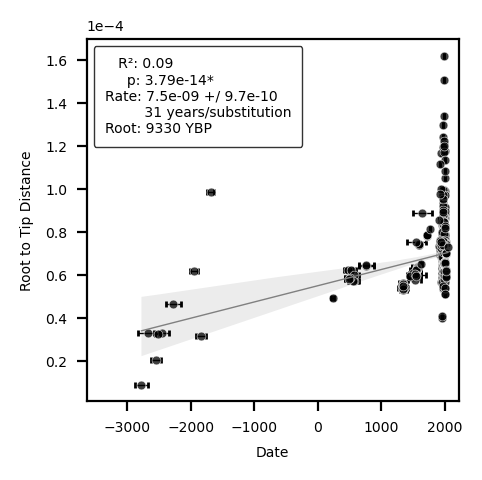

In [245]:
# ---------------------------------------
# PLOT SETUP
TARGET_RES = [480, 480]
DPI=200
FIGSIZE=[TARGET_RES[0] / DPI, TARGET_RES[1] / DPI]
FONTSIZE=5
plt.rc('font', size=FONTSIZE)

geo_dist_all = []
genetic_dist_all = []

fig, ax = plt.subplots(1,figsize=FIGSIZE, dpi=DPI)

df = metadata_gdf

# -----------------------
# Regression
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df["date_mean"],df["rtt_dist"])
r2 = r_value * r_value    
y_intercept = CURRENT_YEAR - (0 - intercept)/slope
p_sig = ""
p_thresh = 0.05    
if p_value < p_thresh:
    p_sig = "*"

mut_per_year = SEQ_LEN * slope
year_per_mut = 1 / mut_per_year

reg_dict = {
    "slope": slope,
    "x_intercept" : intercept,
    "y_intercept" : y_intercept,
    "p_value" : p_value,
    "p_sig" : p_sig,
    "year_per_mut" : year_per_mut
}

sns.regplot(
    ax=ax,
    data=df, 
    x="date_mean", 
    y="rtt_dist", 
    #robust=True,
    ci=95,
    scatter_kws={"s": 0},
    line_kws={"linewidth" : 0.5},
    color="grey",
    #color=df["branch_major_color"][0],
    label=(
    "   R²: {}".format(round(r2,2))
    + "\n     p: {:.2e}{}".format(p_value, p_sig)
    + "\nRate: {:.2} +/ {:.2}".format(slope, std_err)  
    + "\n         {} years/substitution".format(round(year_per_mut))
    + "\nRoot: {} YBP".format(round(y_intercept))                
    )
)

ax.errorbar(
    data=df, 
    x="date_mean",
    y="rtt_dist", 
    xerr="date_err",
    yerr=None,
    ls='none',
    c = "black",  
    capsize=1,
    label=None,
    zorder=1,
    lw=0.5,
    )  

sns.scatterplot(
    ax=ax,
    data=df, 
    x="date_mean",
    s=10,
    y="rtt_dist", 
    ec = "white", 
    color="black",
    alpha=0.75,
    zorder=2,
) 

    
# Set xlimits
xlim = ax.get_xlim()
x_buff = round((xlim[1] - xlim[0]) * 0.1,1)
new_xlim = [xlim[0]-x_buff, xlim[1]+x_buff]
if new_xlim[1] > CURRENT_YEAR:
    new_xlim = [new_xlim[0], CURRENT_YEAR + 200]
ax.set_xlim(new_xlim)
    
ax.set_ylabel("Root to Tip Distance")
ax.set_xlabel("Date")    
ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0)) 

# Format and position legend
legend = ax.legend(
    borderpad=0.8, 
    handletextpad=-2, 
    edgecolor="black", 
    #bbox_to_anchor=(0.5, -0.30), 
    #loc='center',
    fontsize=FONTSIZE,
)
frame = legend.get_frame().set_linewidth(0.5)

out_path = os.path.join(out_dir, "rtt_all")
plt.savefig(out_path + ".png", bbox_inches="tight")
plt.savefig(out_path + ".svg", bbox_inches="tight")

Branch: 0.PRE
Branch: 0.ANT4
Branch: 0.PE
Branch: 0.ANT
Branch: 1.PRE
Branch: 1.ANT
Branch: 1.IN
Branch: 1.ORI
Branch: 2.ANT
Branch: 2.MED
Branch: 3.ANT
Branch: 4.ANT


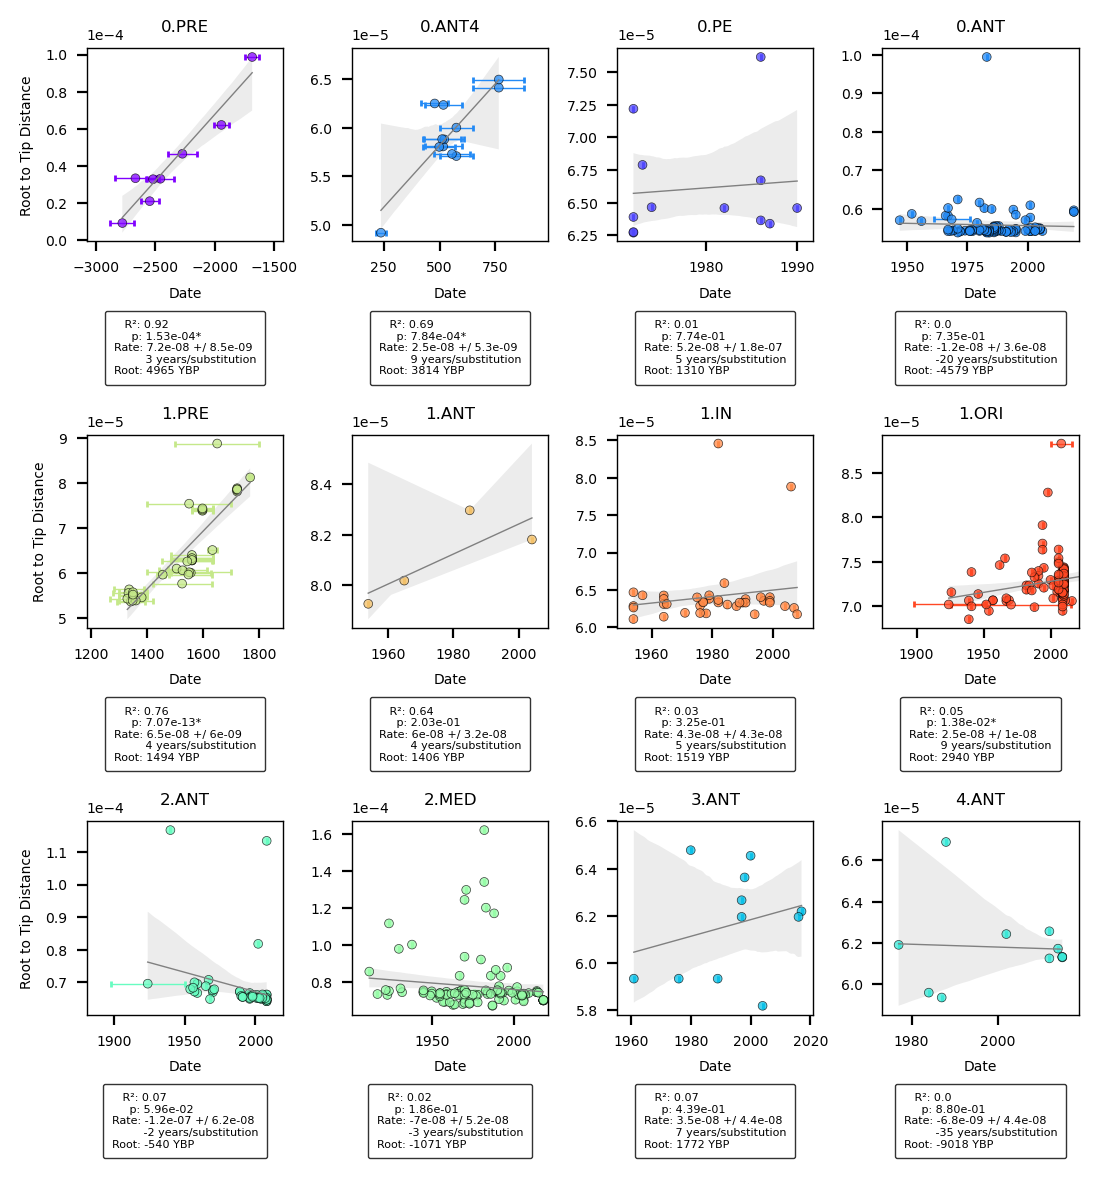

In [198]:
# ---------------------------------------
# PLOT SETUP
TARGET_RES = [1280, 1280]
DPI=200
FIGSIZE=[TARGET_RES[0] / DPI, TARGET_RES[1] / DPI]
FONTSIZE=5
plt.rc('font', size=FONTSIZE)


nrow=3
ncol=4

fig, axes = plt.subplots(nrow,ncol,figsize=FIGSIZE, dpi=DPI)
fig.subplots_adjust(wspace=0.35, hspace=1)

i_row = 0
i_col = 0

for label in BRANCH_LIST:
    print("Branch:", label)
    
    # ----------------------------------------
    # Setup axis
    ax = axes[i_row][i_col]

    df = metadata_gdf[metadata_gdf["branch_minor"].isin(BRANCH_LIST[label])]   
    
    # -----------------------
    # Regression
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df["date_mean"],df["rtt_dist"])
    r2 = r_value * r_value    
    y_intercept = CURRENT_YEAR - (0 - intercept)/slope
    p_sig = ""
    p_thresh = 0.05    
    if p_value < p_thresh:
        p_sig = "*"
        
    mut_per_year = SEQ_LEN * slope
    year_per_mut = 1 / mut_per_year
    
    reg_dict = {
        "slope": slope,
        "x_intercept" : intercept,
        "y_intercept" : y_intercept,
        "p_value" : p_value,
        "p_sig" : p_sig,
        "year_per_mut" : year_per_mut
    }
    
              
    sns.regplot(
        ax=ax,
        data=df, 
        x="date_mean", 
        y="rtt_dist", 
        #robust=True,
        ci=95,
        scatter_kws={"s": 0},
        line_kws={"linewidth" : 0.5},
        color="grey",
        #color=df["branch_major_color"][0],
        label=(
        "   R²: {}".format(round(r2,2))
        + "\n     p: {:.2e}{}".format(p_value, p_sig)
        + "\nRate: {:.2} +/ {:.2}".format(slope, std_err)  
        + "\n         {} years/substitution".format(round(year_per_mut))
        + "\nRoot: {} YBP".format(round(y_intercept))                
        )
    )
    
    ax.errorbar(
        data=df, 
        x="date_mean",
        y="rtt_dist", 
        xerr="date_err",
        yerr=None,
        ls='none',
        c = df["branch_major_color"][0],  
        capsize=1,
        label=None,
        zorder=1,
        lw=0.5,
        )  
    
    sns.scatterplot(
        ax=ax,
        data=df, 
        x="date_mean",
        s=10,
        y="rtt_dist", 
        c = df["branch_major_color"], 
        ec = "black",
        alpha=0.75,
        zorder=2,
    )    
    
    # Set xlimits
    xlim = ax.get_xlim()
    x_buff = round((xlim[1] - xlim[0]) * 0.1,1)
    new_xlim = [xlim[0]-x_buff, xlim[1]+x_buff]
    if new_xlim[1] > CURRENT_YEAR:
        new_xlim = [new_xlim[0], CURRENT_YEAR]
    ax.set_xlim(new_xlim)

    # Format and position legend
    legend = ax.legend(
        borderpad=0.8, 
        handletextpad=-2, 
        edgecolor="black", 
        bbox_to_anchor=(0.5, -0.55), 
        loc='center',
        fontsize=FONTSIZE * 0.80,
    )
    frame = legend.get_frame().set_linewidth(0.5)
        
    # Format axis
    ax.set_title(label)

    if i_col == 0:
        ax.set_ylabel("Root to Tip Distance")
    else:
        ax.set_ylabel("")
    ax.set_xlabel("Date")    
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))    
    
    for spine in ax.spines:
        ax.spines[spine].set_linewidth(0.5)    
            

    # Update axis
    if i_col == ncol - 1:
        i_col = 0
        i_row += 1
    else:
        i_col += 1
        
    
out_path = os.path.join(out_dir, "rtt_clades")
plt.savefig(out_path + ".png", bbox_inches="tight")
plt.savefig(out_path + ".svg", bbox_inches="tight")

## Prep Dataframes

In [14]:
# Marker sizes
sizes_dict = {}

for lat,lon in zip(metadata_gdf["geometry_lat"], metadata_gdf["geometry_lon"]):
    if (lat,lon) not in sizes_dict:
        sizes_dict[(lat,lon)] = 0
    sizes_dict[(lat,lon)] += 1
    
# Add size info
for rec in metadata_gdf.iterrows():
    sample = rec[0]
    lat,lon = rec[1]["geometry_lat"], rec[1]["geometry_lon"]
    metadata_gdf.at[sample, "geometry_size"] = sizes_dict[(lat,lon)]
    
ancient_gdf = metadata_gdf[metadata_gdf["biosample_comment"].str.contains("Ancient")]
modern_gdf  = metadata_gdf[metadata_gdf["biosample_comment"].str.contains("Modern")]

# Residuals

Branch: 0.PRE
Branch: 0.ANT4
Branch: 1.PRE


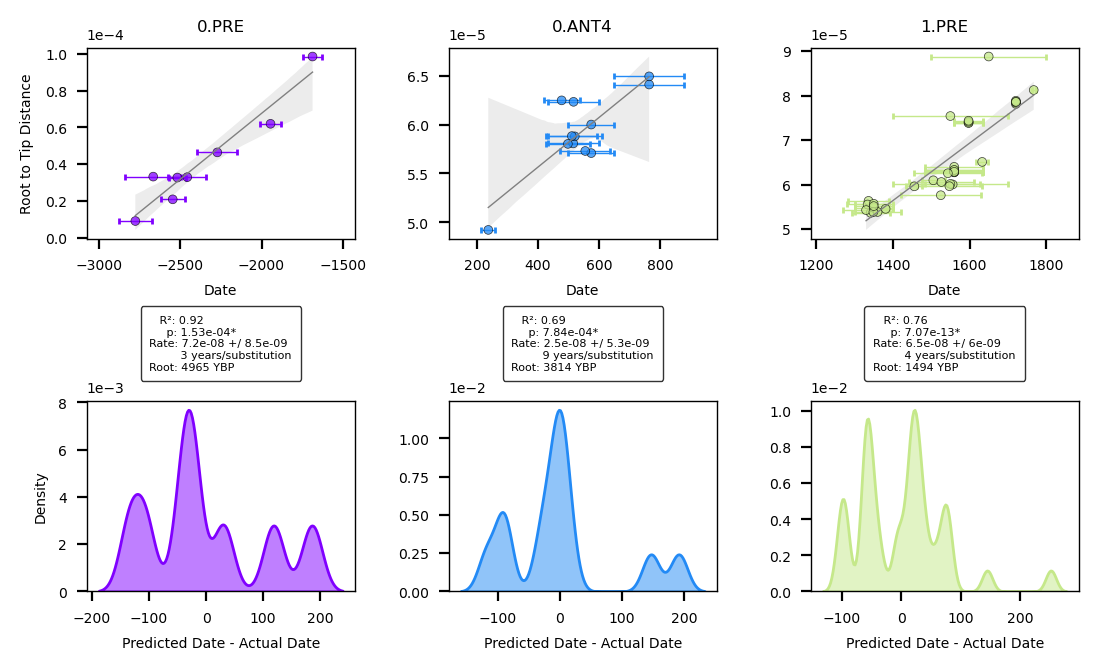

In [200]:
# ---------------------------------------
# PLOT SETUP
TARGET_RES = [1280, 720]
DPI=200
FIGSIZE=[TARGET_RES[0] / DPI, TARGET_RES[1] / DPI]
FONTSIZE=5
plt.rc('font', size=FONTSIZE)


nrow=2
ncol=3

fig, axes = plt.subplots(nrow,ncol,figsize=FIGSIZE, dpi=DPI)
fig.subplots_adjust(wspace=0.35, hspace=0.85)

for row in axes:
    for ax in row:
        for spine in ax.spines:
            ax.spines[spine].set_linewidth(0.5) 

i_row = 0
i_col = 0

for label in ANCIENT_BRANCH_LIST:
    print("Branch:", label)
    
    # ----------------------------------------
    # Setup axis
    ax = axes[i_row][i_col]

    df = metadata_gdf[metadata_gdf["branch_minor"].isin(BRANCH_LIST[label])]   
    
    # -----------------------
    # Regression
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df["date_mean"],df["rtt_dist"])
    r2 = r_value * r_value    
    y_intercept = CURRENT_YEAR - (0 - intercept)/slope
    p_sig = ""
    p_thresh = 0.05    
    if p_value < p_thresh:
        p_sig = "*"
        
    mut_per_year = SEQ_LEN * slope
    year_per_mut = 1 / mut_per_year
    
    reg_dict = {
        "slope": slope,
        "x_intercept" : intercept,
        "y_intercept" : y_intercept,
        "p_value" : p_value,
        "p_sig" : p_sig,
        "year_per_mut" : year_per_mut
    }
    
              
    sns.regplot(
        ax=ax,
        data=df, 
        x="date_mean", 
        y="rtt_dist", 
        #robust=True,
        ci=95,
        scatter_kws={"s": 0},
        line_kws={"linewidth" : 0.5},
        color="grey",
        #color=df["branch_major_color"][0],
        label=(
        "   R²: {}".format(round(r2,2))
        + "\n     p: {:.2e}{}".format(p_value, p_sig)
        + "\nRate: {:.2} +/ {:.2}".format(slope, std_err)  
        + "\n         {} years/substitution".format(round(year_per_mut))
        + "\nRoot: {} YBP".format(round(y_intercept))                
        )
    )
    
    ax.errorbar(
        data=df, 
        x="date_mean",
        y="rtt_dist", 
        xerr="date_err",
        yerr=None,
        ls='none',
        c = df["branch_major_color"][0],  
        capsize=1,
        label=None,
        zorder=1,
        lw=0.5,
        )  
    
    sns.scatterplot(
        ax=ax,
        data=df, 
        x="date_mean",
        s=10,
        y="rtt_dist", 
        c = df["branch_major_color"], 
        ec = "black",
        alpha=0.75,
        zorder=2,
    )    
    
        
    # Set xlimits
    xlim = ax.get_xlim()
    x_buff = round((xlim[1] - xlim[0]) * 0.1,1)
    new_xlim = [xlim[0]-x_buff, xlim[1]+x_buff]
    if new_xlim[1] > CURRENT_YEAR:
        new_xlim = [new_xlim[0], CURRENT_YEAR]
    ax.set_xlim(new_xlim)

    # Format and position legend
    legend = ax.legend(
        borderpad=0.8, 
        handletextpad=-2, 
        edgecolor="black", 
        bbox_to_anchor=(0.5, -0.55), 
        loc='center',
        fontsize=FONTSIZE * 0.80,
    )
    frame = legend.get_frame().set_linewidth(0.5)
        
    # Format axis
    ax.set_title(label)

    if i_col == 0:
        ax.set_ylabel("Root to Tip Distance")
    else:
        ax.set_ylabel("")
    ax.set_xlabel("Date")    
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))    
      
            
    # Now predicted values
    i_row += 1
    ax = axes[i_row][i_col]    
    
    date_diffs = []
    for date_mean, rtt_dist in zip(df["date_mean"], df["rtt_dist"]):
        pred_date = (rtt_dist - reg_dict["x_intercept"]) / reg_dict["slope"]
        date_diff = pred_date - date_mean
        date_diffs.append(date_diff)
    sns.kdeplot(
       date_diffs,
       ax=ax,
       fill=True, 
       common_norm=True,
       alpha=0.5, 
       linewidth=1,
       bw_adjust=0.25,
       color=df["branch_major_color"][0],
    )
    
    if i_col == 0:
        ax.set_ylabel("Density")
    else:
        ax.set_ylabel("")
    ax.set_xlabel("Predicted Date - Actual Date")    
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))      

                 
    # Update axis
    i_row = 0
    i_col += 1
        
    
out_path = os.path.join(out_dir, "tip-dating")
plt.savefig(out_path + ".png", bbox_inches="tight")
plt.savefig(out_path + ".svg", bbox_inches="tight")

In [18]:
print("All:", len(metadata_gdf))
print("Ancient:",len(ancient_gdf), len(ancient_gdf) / len(metadata_gdf))
print("Ancient:",len(modern_gdf), len(modern_gdf) / len(metadata_gdf))

All: 601
Ancient: 61 0.10149750415973377
Ancient: 539 0.8968386023294509


In [ ]:
"""TARGET_RES = [1280, 720]
DPI=200
FIGSIZE=[TARGET_RES[0] / DPI, TARGET_RES[1] / DPI]
fig, ax = plt.subplots(1, dpi=DPI, figsize=FIGSIZE)

rtt_dist_ln = []
for rtt_dist in df["rtt_dist"]:
    rtt_dist_ln.append(math.log(rtt_dist))

sns.kdeplot(
   rtt_dist_ln,
    ax=ax,
)"""

---
# Geography

## Isolation By Distance

### Prep Data

In [19]:
ibd_dict = {}

for label in BRANCH_LIST:
    print("Label:", label)    
    ibd_dict[label] = {"geo_dist" : [], "genetic_dist" : []}
    df = metadata_gdf[metadata_gdf["branch_minor"].isin(BRANCH_LIST[label])]   
    
    i_compare = 0
    i = 0
    for sample1 in df.index:
        geom1 = df["geometry"][sample1]
        coord1 = (geom1.y, geom1.x)  
        for sample2 in df.index[i_compare:]:
            if sample1 == sample2: continue
            geom2 = df["geometry"][sample2]
            coord2 = (geom2.y, geom2.x)
            geo_dist = geopy.distance.great_circle(coord1, coord2).km
            genetic_dist = divtree.distance(sample1, sample2)

            ibd_dict[label]["geo_dist"].append(geo_dist)
            ibd_dict[label]["genetic_dist"].append(genetic_dist)
        i_compare += 1

Label: 0.PRE
Label: 0.ANT4
Label: 0.PE
Label: 0.ANT
Label: 1.PRE
Label: 1.ANT
Label: 1.IN
Label: 1.ORI
Label: 2.ANT
Label: 2.MED
Label: 3.ANT
Label: 4.ANT


IndexError: index 3 is out of bounds for axis 0 with size 3

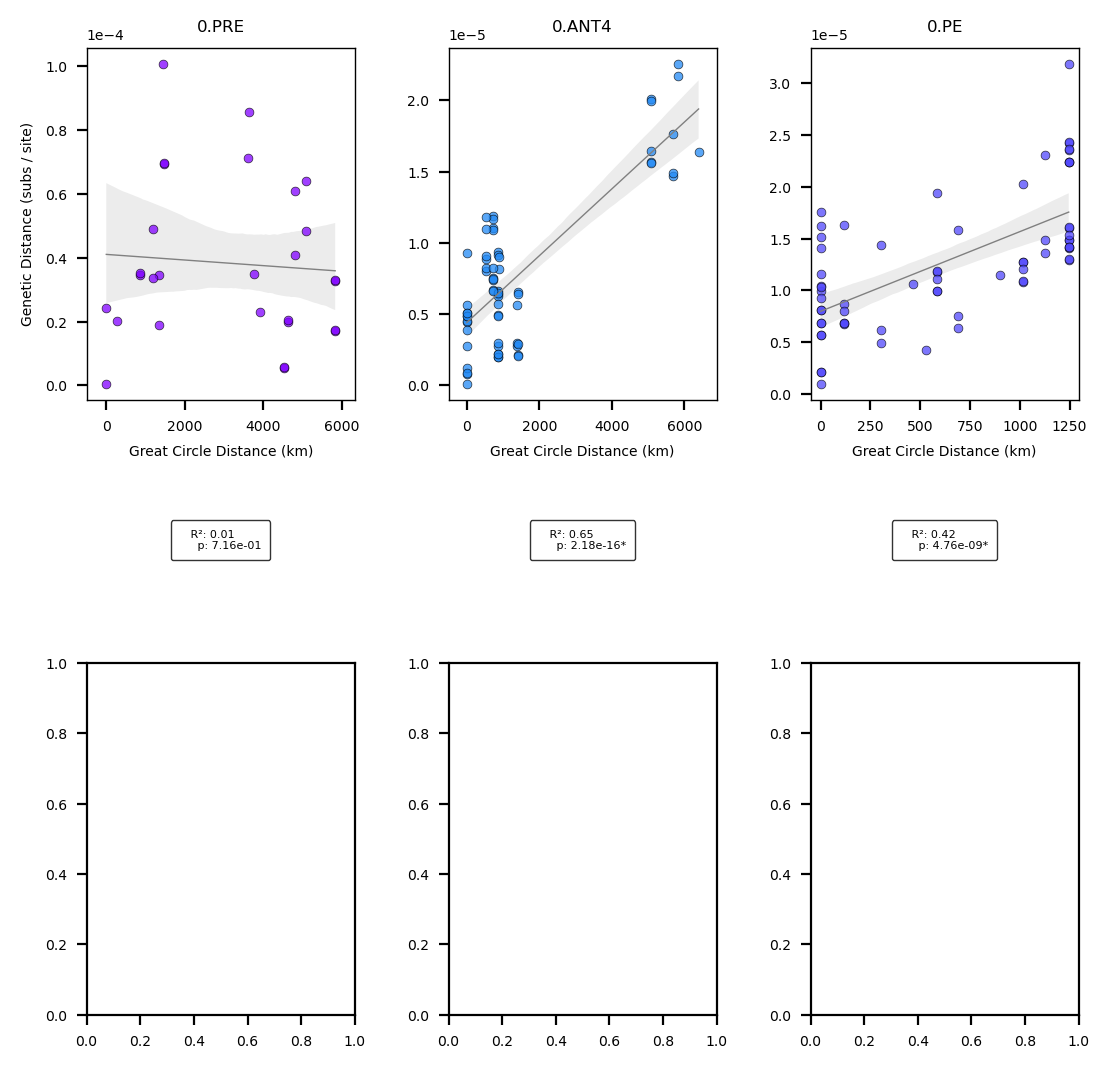

In [223]:
# ---------------------------------------
# PLOT SETUP
TARGET_RES = [1280, 1280]
DPI=200
FIGSIZE=[TARGET_RES[0] / DPI, TARGET_RES[1] / DPI]
FONTSIZE=5
plt.rc('font', size=FONTSIZE)

fig, axes = plt.subplots(nrow,ncol,figsize=FIGSIZE, dpi=DPI)
fig.subplots_adjust(wspace=0.35, hspace=0.75)


nrow=3
ncol=4
i_row = 0
i_col = 0

for label in BRANCH_LIST:
    # ----------------------------------------
    # Setup axis
    ax = axes[i_row][i_col]

    df = metadata_gdf[metadata_gdf["branch_minor"].isin(BRANCH_LIST[label])]   
    
    for branch_major in colors_dict:
        if branch_major in label:
            break  
            
    # -----------------------
    # Regression
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(ibd_dict[label]["geo_dist"],ibd_dict[label]["genetic_dist"])
    r2 = r_value * r_value    
    y_intercept = CURRENT_YEAR - (0 - intercept)/slope
    p_sig = ""
    p_thresh = 0.05    
    if p_value < p_thresh:
        p_sig = "*"
        
    mut_per_year = SEQ_LEN * slope
    year_per_mut = 1 / mut_per_year
    
    reg_dict = {
        "slope": slope,
        "x_intercept" : intercept,
        "y_intercept" : y_intercept,
        "p_value" : p_value,
        "p_sig" : p_sig,
        "year_per_mut" : year_per_mut
    }
    
    sns.regplot(
        ax=ax,
        x=ibd_dict[label]["geo_dist"],
        y=ibd_dict[label]["genetic_dist"],
        ci=95,
        scatter_kws={"s": 0},
        color="grey",
        line_kws={"linewidth":0.5},
        label=(
        "   R²: {}".format(round(r2,2))
        + "\n     p: {:.2e}{}".format(p_value, p_sig)             
        )
    )

    sns.scatterplot(
        ax=ax,
        x=ibd_dict[label]["geo_dist"],
        y=ibd_dict[label]["genetic_dist"],
        s=10,
        ec = "black",
        color = colors_dict[branch_major],         
        alpha=0.75,
        zorder=2,
    )
     
    # Format and position legend
    legend = ax.legend(
        borderpad=0.8, 
        handletextpad=-2, 
        edgecolor="black", 
        bbox_to_anchor=(0.5, -0.40), 
        loc='center',
        fontsize=FONTSIZE * 0.80,
    )
    frame = legend.get_frame().set_linewidth(0.5)        
    
    # Set xlimits
    xlim = ax.get_xlim()
    if xlim[1] > 20000:
        xbuff = 5000   
    elif xlim[1] > 2000:
        xbuff = 500
    elif xlim[1] > 200:
        xbuff = 50
    ax.set_xlim(0-xbuff, xlim[1] + xbuff)
        
    # Format axis
    ax.set_title(label)

    if i_col == 0:
        ax.set_ylabel("Genetic Distance (subs / site)")
    else:
        ax.set_ylabel("")
    ax.set_xlabel("Great Circle Distance (km)")
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))    
    
    for spine in ax.spines:
        ax.spines[spine].set_linewidth(0.5)    
            

    # Update axis
    if i_col == ncol - 1:
        i_col = 0
        i_row += 1
    else:
        i_col += 1

    
out_path = os.path.join(out_dir, "ibd_clades")
plt.savefig(out_path + ".png", bbox_inches="tight")
plt.savefig(out_path + ".svg", bbox_inches="tight")

### All

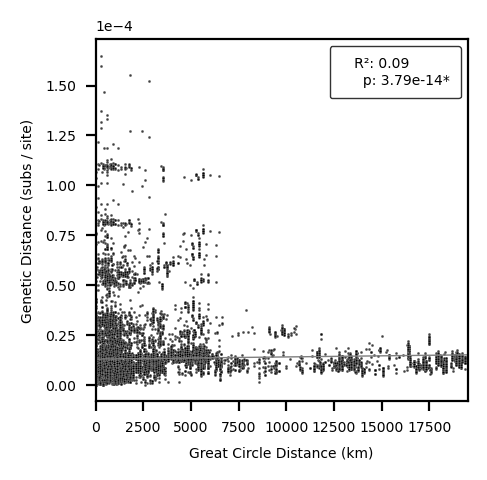

In [248]:
# ---------------------------------------
# PLOT SETUP
TARGET_RES = [480, 480]
DPI=200
FIGSIZE=[TARGET_RES[0] / DPI, TARGET_RES[1] / DPI]
FONTSIZE=5
plt.rc('font', size=FONTSIZE)

geo_dist_all = []
genetic_dist_all = []

fig, ax = plt.subplots(1,figsize=FIGSIZE, dpi=DPI)

for branch in ibd_dict:
    geo_dist_all = geo_dist_all + ibd_dict[branch]["geo_dist"]
    genetic_dist_all = genetic_dist_all + ibd_dict[branch]["genetic_dist"]

sns.regplot(
    ax=ax,
    x=geo_dist_all,
    y=genetic_dist_all,
    ci=95,
    scatter_kws={"s": 0},
    color="grey",
    line_kws={"linewidth":0.5},
    label=(
    "   R²: {}".format(round(r2,2))
    + "\n     p: {:.2e}{}".format(p_value, p_sig)             
    )
)
    
sns.scatterplot(
    ax=ax,
    x=geo_dist_all,
    y=genetic_dist_all,
    s=1,
    ec = "white", 
    color="black",
    alpha=0.75,
    zorder=2,
)

# Format and position legend
legend = ax.legend(
    borderpad=0.8, 
    handletextpad=-2, 
    edgecolor="black", 
    #bbox_to_anchor=(0.5, -0.30), 
    #loc='center',
    fontsize=FONTSIZE,
)
frame = legend.get_frame().set_linewidth(0.5)

ax.set_ylabel("Genetic Distance (subs / site)")
ax.set_xlabel("Great Circle Distance (km)")
ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))    

out_path = os.path.join(out_dir, "ibd_all")
plt.savefig(out_path + ".png", bbox_inches="tight")
plt.savefig(out_path + ".svg", bbox_inches="tight")

## Map

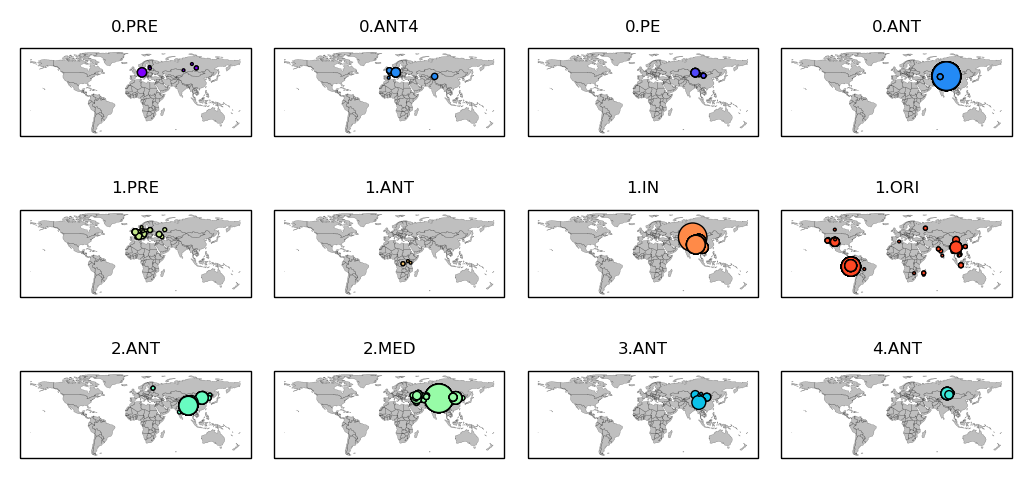

In [86]:
# ---------------------------------------
# PLOT SETUP
TARGET_RES = [1280, 1280]
DPI=200
FIGSIZE=[TARGET_RES[0] / DPI, TARGET_RES[1] / DPI]
FONTSIZE=5
plt.rc('font', size=FONTSIZE)

nrow=3
ncol=4

fig, axes = plt.subplots(nrow, ncol, subplot_kw={'projection': CRS_EPSG},
                        figsize=FIGSIZE, dpi=DPI)
fig.subplots_adjust(wspace=0.1, hspace=-0.75)
i_row = 0
i_col = 0

for label in BRANCH_LIST:
    
    # ----------------------------------------
    # Setup axis
    ax = axes[i_row][i_col]

    df = metadata_gdf[metadata_gdf["branch_minor"].isin(BRANCH_LIST[label])]   
    
    for branch_major in colors_dict:
        if branch_major in label:
            break  
    
    # --------------------------------------
    # World Basemap
    world_polygons.plot(
        ax=ax, 
        zorder=1, 
        alpha=0.5, 
        color="grey",
        edgecolor="black", 
        linewidth=0.1,
    ) 

    df = metadata_gdf[metadata_gdf["branch_minor"].isin(BRANCH_LIST[label])]   
    df.plot(ax=ax, ec="black", lw=0.5, color=colors_dict[branch_major], markersize=df["geometry_size"], linewidth=0.5)

    # Sorry Antarctica
    ax.set_ylim(-60,90)
    
    ax.set_title(label)
    ax.set_xticks([])
    ax.set_yticks([])
    for spine in ax.spines:
        ax.spines[spine].set_linewidth(0.5)        
    
    # Update axis
    if i_col == ncol - 1:
        i_col = 0
        i_row += 1
    else:
        i_col += 1
        
out_path = os.path.join(out_dir, "map_clades")
plt.savefig(out_path + ".png", bbox_inches="tight")
plt.savefig(out_path + ".svg", bbox_inches="tight")

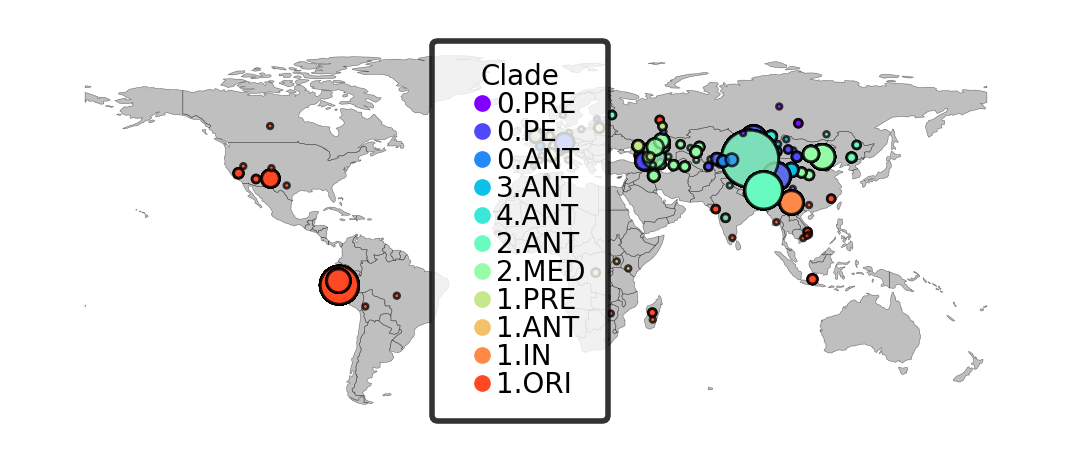

In [121]:
# ---------------------------------------
# PLOT SETUP
TARGET_RES = [1280, 1280]
DPI=400
FIGSIZE=[TARGET_RES[0] / DPI, TARGET_RES[1] / DPI]
FONTSIZE=5

## All
fig, ax = plt.subplots(1, subplot_kw={'projection': CRS_EPSG},
                        figsize=FIGSIZE, dpi=DPI)
world_polygons.plot(
    ax=ax, 
    zorder=1, 
    alpha=0.5, 
    color="grey",
    edgecolor="black", 
    linewidth=0.1,
) 

metadata_gdf.plot(
    ax=ax, 
    ec="black", 
    lw=0.5, 
    color=metadata_gdf["branch_major_color"], 
    markersize=metadata_gdf["geometry_size"], 
    linewidth=0.5,
    alpha=0.75,
)

ax.axis("off")

# Sorry Antarctica
ax.set_ylim(-60,90)

clade_lines = [lines.Line2D([0], [0], color=colors_dict[state], lw=0, markersize=2, marker="o") 
                for state in colors_dict]
clade_labels = [state for state in colors_dict]

clade_legend = fig.legend(clade_lines, 
           clade_labels,
           #ncol=len(clade_labels),
           ncol=1,
           loc="center", 
           bbox_to_anchor=(0.5, 0.50),
           frameon=True,
            borderpad=0.8, 
            handletextpad=-0.5, 
           labelspacing=0,
           edgecolor="black",
           title="Clade",
           fontsize=FONTSIZE / 2,
           title_fontsize=FONTSIZE,
          )

out_path = os.path.join(out_dir, "map_all")
plt.savefig(out_path + ".png", bbox_inches="tight")
plt.savefig(out_path + ".svg", bbox_inches="tight")

## Modern Human Plague Cases

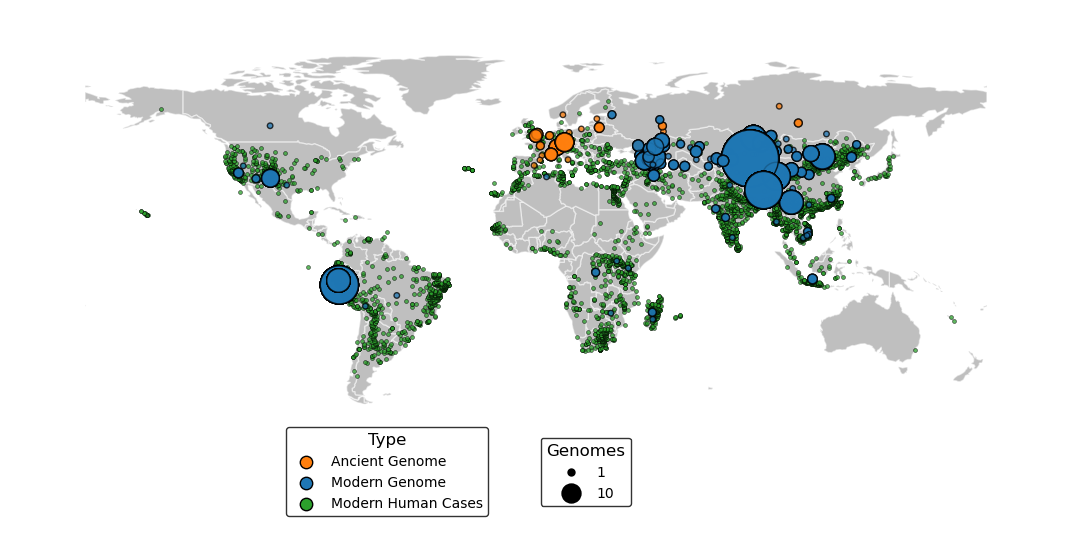

In [173]:
TARGET_RES = [1280, 1280]
DPI=400
FIGSIZE=[TARGET_RES[0] / DPI, TARGET_RES[1] / DPI]
plt.rc("legend", title_fontsize=MED_FONT)  # fontsize of the legend title
plt.rc("legend", fontsize=MED_FONT)  # fontsize of the legend title

fig, ax_map = plt.subplots(1, dpi=DPI, figsize=FIGSIZE)
# --------------------------------------
# World Basemap
world_poly = world_polygons.plot(
    ax=ax_map, 
    zorder=1, 
    alpha=0.5, 
    color="grey",
    edgecolor="white", 
    linewidth=0.25,
)
xu_2019_gdf.plot(ax=ax_map,  markersize=0.5, alpha=0.75, ec="black", lw=0.1, c=D3_PAL[2])
ancient_gdf.plot(ax=ax_map,  markersize=ancient_gdf["geometry_size"], alpha=0.75, ec="black", lw=0.25, c=D3_PAL[1])
modern_gdf.plot(ax=ax_map,  markersize=modern_gdf["geometry_size"], alpha=0.75, ec="black", lw=0.25, c=D3_PAL[0])
# Sorry Antarctica
ax_map.set_ylim(-60,90)
ax_map.axis('off')  

out_path = os.path.join(out_dir, "map_xu-2019")
plt.savefig(out_path + ".png", bbox_inches="tight")
plt.savefig(out_path + ".svg", bbox_inches="tight")

# Origin Legend
o = [ax_map.scatter(0,-9000, s=5, ec="black", marker="o", c=D3_PAL[1], lw=0.25),
     ax_map.scatter(0,-9000, s=5, ec="black", marker="o", c=D3_PAL[0], lw=0.25),
     ax_map.scatter(0,-9000, s=5, ec="black", marker="o", c=D3_PAL[2], lw=0.25),     
    ]
ol = ["Ancient Genome", "Modern Genome", "Modern Human Cases"]

leg_origin = plt.legend(
    o, ol, title="Type", loc="center", bbox_to_anchor=[0.35,-0.15], edgecolor="black",
    fontsize=FONTSIZE / 2, title_fontsize=FONTSIZE - 2)
leg_origin.get_frame().set_linewidth(0.25)

# Size Legend
s = [ax_map.scatter(0,-9000, s=1, ec="black", c="black", lw=0.5),
     ax_map.scatter(0,-9000, s=10, ec="black", c="black", lw=0.5),  
    ]
sl = ["1", "10"]
leg_size = plt.legend(s, sl, title="Genomes", loc="center", bbox_to_anchor=[0.55,-0.15], edgecolor="black",
                    fontsize=FONTSIZE / 2, title_fontsize=FONTSIZE - 2)
leg_size.get_frame().set_linewidth(0.25)

ax_map.add_artist(leg_origin)

out_path = os.path.join(out_dir, "map_comparison")
plt.savefig(out_path + ".png", bbox_inches="tight")
plt.savefig(out_path + ".svg", bbox_inches="tight")